In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

df=pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape

(768, 9)

In [3]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

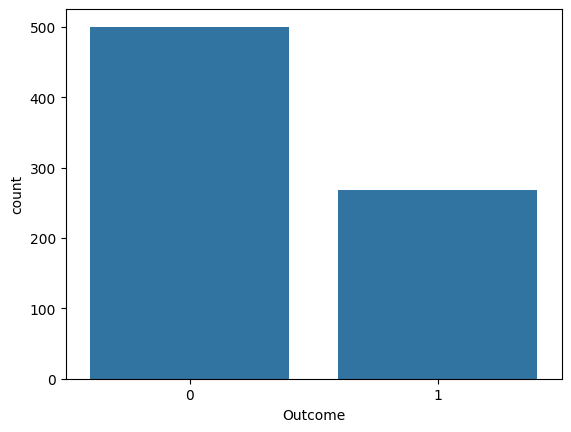

In [7]:
sns.countplot(data=df,x='Outcome');

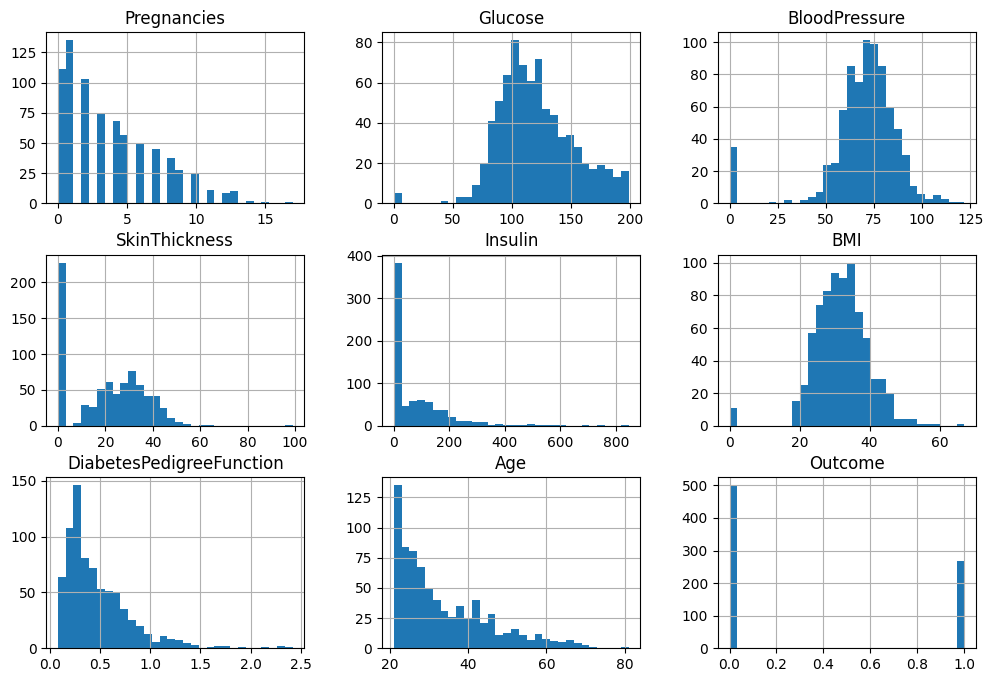

In [8]:
df.hist(bins=30,figsize=(12,8))
plt.show()

<Axes: xlabel='BMI', ylabel='Count'>

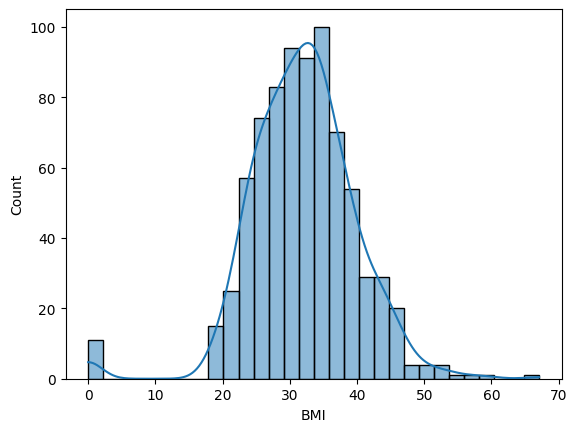

In [9]:
#histogram
sns.histplot(df['BMI'],bins=30,kde=True)

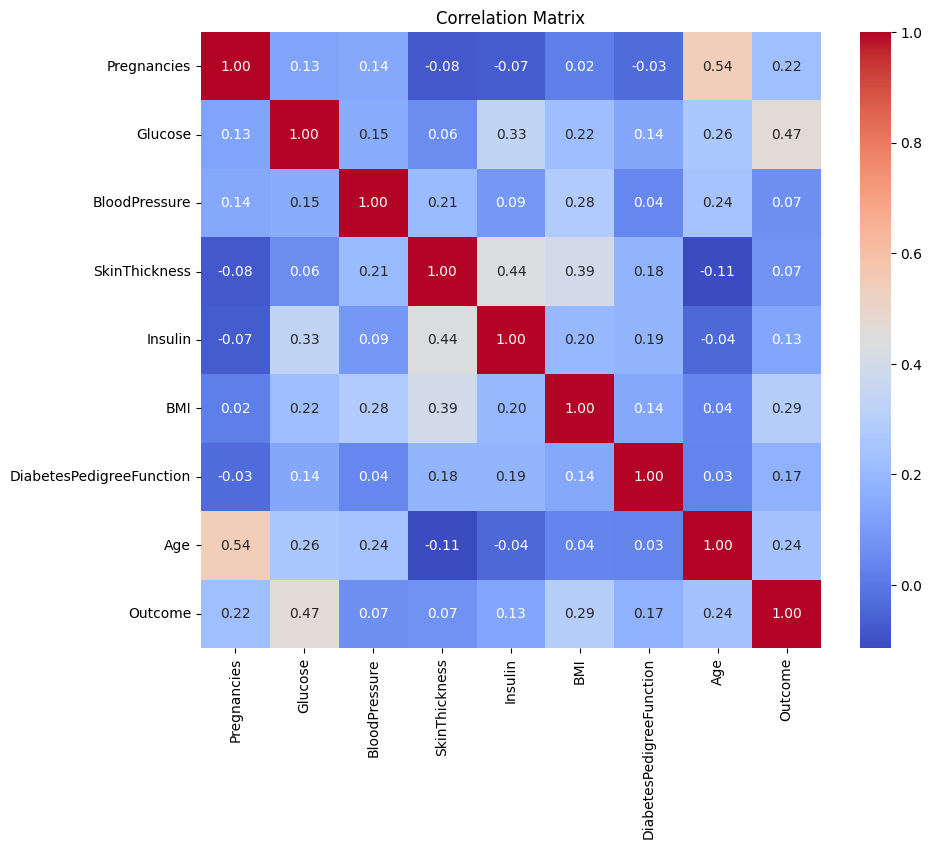

In [10]:
numeric = df.select_dtypes(include=[np.number])
corr_matrix = numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

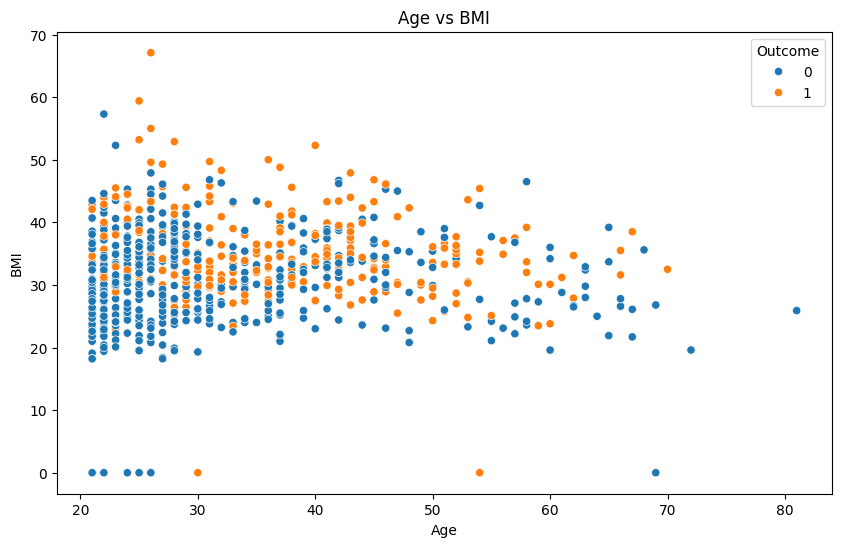

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome')
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

C:\Users\IICET 20\AppData\Local\Temp\ipykernel_2020\2985815505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outcome', y='BMI', data=df,palette='muted')


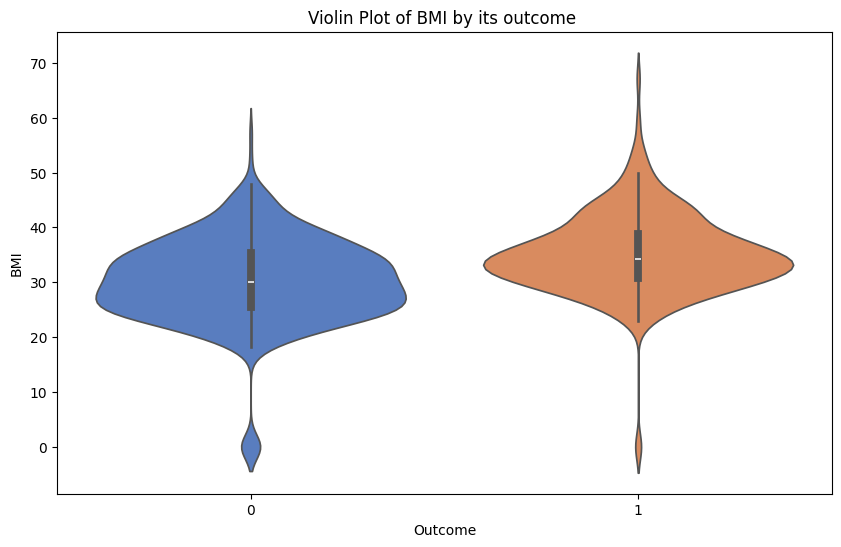

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Outcome', y='BMI', data=df,palette='muted')
plt.title('Violin Plot of BMI by its outcome ')
plt.xlabel('Outcome')
plt.ylabel('BMI')
plt.show()

In [13]:
import pickle
X=df.drop('Outcome',axis=1)
y=df['Outcome']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

with open('scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)

with open('scaler.pkl','rb') as scaler_file:
    scaler=pickle.load(scaler_file)

In [14]:
log_reg=LogisticRegressionCV()
log_reg.fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)
accuracy_log_reg=accuracy_score(y_test,y_pred_log_reg)
conf_matrix_log_reg=confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
print(f'Logistic Regression Accuracy:{accuracy_log_reg:.2f}')
print('confusion matrix:')
print(conf_matrix_log_reg)
print('classification report')
print(class_report_log_reg)

Logistic Regression Accuracy:0.75
confusion matrix:
[[79 20]
 [18 37]]
classification report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [15]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_tree=accuracy_score(y_test,y_pred_tree)
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)
class_report_tree=classification_report(y_test,y_pred_tree)
print(f'Decision Tree Accuracy:{accuracy_tree:.2f}')
print('Confusion Matrix:')
print(conf_matrix_tree)
print('classification_report:')
print(class_report_tree)

Decision Tree Accuracy:0.77
Confusion Matrix:
[[77 22]
 [14 41]]
classification_report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        99
           1       0.65      0.75      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



In [16]:
knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
conf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
print(f'k-NN Accuracy:{accuracy_knn:.2f}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('classification_report:')
print(class_report_knn)

k-NN Accuracy:0.69
Confusion Matrix:
[[79 20]
 [27 28]]
classification_report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [17]:
from sklearn import svm
clf=svm.SVC(decision_function_shape='ovo')
clf.fit(X_test,y_test) 
y_pred_clf=clf.predict(X_test)
accuracy_clf=accuracy_score(y_test,y_pred_clf)
conf_matrix_clf=confusion_matrix(y_test,y_pred_clf) 
class_report_clf=classification_report(y_test,y_pred_clf)
print(f'SVM:{accuracy_clf:.2f}')
print('Confusion matrix:')
print(conf_matrix_clf)
print('classification_report')
print(class_report_clf)

SVM:0.88
Confusion matrix:
[[94  5]
 [13 42]]
classification_report
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        99
           1       0.89      0.76      0.82        55

    accuracy                           0.88       154
   macro avg       0.89      0.86      0.87       154
weighted avg       0.88      0.88      0.88       154



In [18]:
from sklearn.linear_model import SGDClassifier
classify=SGDClassifier(loss='hinge',penalty='l2',max_iter=5)
classify.fit(X_test,y_test)
y_pred_classify=classify.predict(X_test)
accuracy_classify=accuracy_score(y_test,y_pred_classify)
conf_matrix_classify=confusion_matrix(y_test,y_pred_classify) 
class_report_classify=classification_report(y_test,y_pred_classify)
print(f'SGD:{accuracy_classify:.2f}')
print('Confusion matrix:')
print(conf_matrix_classify)
print('classification_report')
print(class_report_classify)

SGD:0.75
Confusion matrix:
[[77 22]
 [17 38]]
classification_report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        99
           1       0.63      0.69      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



c:\Users\IICET 20\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [19]:
import pickle
from sklearn.ensemble import RandomForestClassifier
random_clf=RandomForestClassifier(n_estimators=100)
random_clf.fit(X_test,y_test)
y_pred_random=random_clf.predict(X_test)
accuracy_random=accuracy_score(y_test,y_pred_random)
conf_matrix_random=confusion_matrix(y_test,y_pred_random)
class_report_random=classification_report(y_test,y_pred_random)
print(f'Random Forest:{accuracy_random:.2f}')
print('Confusion matrix:')
print(conf_matrix_random)
print('classification_report')
print(class_report_random)

file_name='diabetes_model.pickle'
pickle.dump(random_clf,open(file_name,'wb'))
loaded_model=pickle.load(open(file_name,'rb'))

Random Forest:1.00
Confusion matrix:
[[99  0]
 [ 0 55]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00        55

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [20]:
import pickle
import numpy as np

def infer_diabetes(model_path, scaler_path, input_features):
    """
    Perform inferencing on the diabetes dataset.

    Parameters:
    - model_path (str): Path to the saved model pickle file.
    - scaler_path (str): Path to the saved scaler pickle file.
    - input_features (list): List of input features in the order:
      [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI,
      DiabetesPedigreeFunction, Age]

    Returns:
    - str: "Diabetes Detected" if Outcome is 1, otherwise "No Diabetes".
    """
    try:
        # Load the trained model and scaler
        with open(r'C:\Users\IICET 20\Desktop\Simra kazi\Machine Learning\Diabetes Project\diabetes_model.pickle', 'rb') as model_file:
            model = pickle.load(model_file)

        with open(r'C:\Users\IICET 20\Desktop\Simra kazi\Machine Learning\Diabetes Project\scaler.pkl', 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)

        # Ensure the input features are in the correct format
        input_array = np.array([input_features]).reshape(1, -1)

        # Scale the input features
        scaled_input = scaler.transform(input_array)

        # Predict outcome
        prediction = model.predict(scaled_input)

        # Return result
        return "Diabetes Detected" if prediction[0] == 1 else "No Diabetes"

    except Exception as e:
        return f"An error occurred: {e}"


In [21]:
# Example input: Replace with actual values
input_features = [2, 120, 70, 30, 80, 32.0, 0.5, 25]

# Paths to your saved files
model_path = 'diabetes_model.pkl'
scaler_path = 'scaler.pkl'

# Perform inference
result = infer_diabetes(model_path, scaler_path, input_features)
print(result)


No Diabetes


c:\Users\IICET 20\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
